## Imports y carga de datos
Se analiza el problema, se importan los paquetes necesarios para realizar análisis preliminares.


In [64]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Machine learning
from sklearn.linear_model import  Ridge, Lasso, LinearRegression, SGDRegressor, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,  AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay



file_name = "dataset_SCL.csv"

dataset = pd.read_csv(file_name)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Análisis de datos.
**¿Qué se nos pide?**
Modelo predictivo para ver si un vuelo se atrasará o no.


# Análisis del problema.

Para predecir la probabilidad de atraso de un vuelo, lo primero que se necesita es definir claramente qué se entiende por atraso en este contexto. Una vez que se tenga una definición clara, se pueden seleccionar las variables del dataset que se consideran relevantes para predecir el atraso de un vuelo. Algunas variables que podrían ser relevantes podrían ser la hora programada del vuelo, la hora de operación del vuelo, el día de la semana, el mes y el año de operación, el tipo de vuelo, el nombre de la aerolínea que opera el vuelo, y el nombre de las ciudades de origen y destino.

Una vez seleccionadas las variables relevantes, se pueden utilizar técnicas de machine learning para entrenar un modelo que pueda predecir la probabilidad de atraso de un vuelo en función de estas variables. Por ejemplo, se podría utilizar un modelo de regresión logística para predecir la probabilidad de atraso en términos de una combinación lineal de las variables seleccionadas. Una vez entrenado el modelo, se podría evaluar su desempeño en términos de su precisión y su capacidad de generalización a nuevos datos.

Es importante tener en cuenta que la precisión del modelo dependerá en gran medida de la calidad y cantidad de los datos utilizados para entrenarlo. Por lo tanto, es fundamental asegurarse de que el dataset utilizado sea lo suficientemente completo y preciso para entrenar un modelo preciso y generalizable.

Para predecir la probabilidad de atraso de los vuelos, se podrían utilizar técnicas de machine learning como regresión logística o random forest. Primero se debería preprocesar los datos, eliminando columnas irrelevantes y tratando los valores nulos. Luego se debería crear una variable que indique si un vuelo tuvo atraso o no, basado en la diferencia entre la fecha y hora programada y la fecha y hora de operación. A continuación, se podrían utilizar las variables restantes como variables predictoras para entrenar el modelo de machine learning y así poder predecir la probabilidad de atraso de un vuelo.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [5]:
# Se transforman los datos de Fecha.
dataset['Fecha-I'] = pd.to_datetime(dataset['Fecha-I'])
dataset['Fecha-O'] = pd.to_datetime(dataset['Fecha-O'])
dataset.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [6]:
print("Se puede saber que de los {} vuelos que partieron en su lugar de origen de manera planificada, sólo {} vuelos no lograron llegar a su destino planificado.".format(sum(dataset["Ori-I"] == dataset["Ori-O"] ),  sum(dataset["Ori-I"] == dataset["Ori-O"] ) - sum(dataset["Des-I"] == dataset["Des-O"] ) ) ) 

Se puede saber que de los 68206 vuelos que partieron en su lugar de origen de manera planificada, sólo 28 vuelos no lograron llegar a su destino planificado.


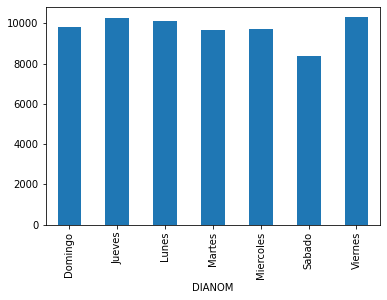

In [7]:
dataset.groupby(["DIANOM"]).count()["DIA"].plot.bar()

El rango de vuelos por día estuvieron entre 8000 y 11000. Siendo el día viernes el día donde más vuelos se producen y el día sábado donde menores vuelo se producen.

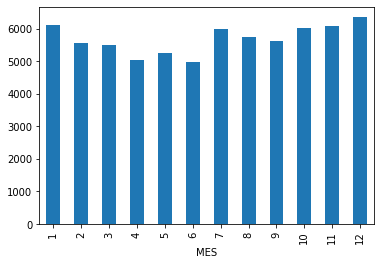

In [8]:
dataset.groupby(["MES"]).count()["DIA"].plot.bar()

Si lo desglosamos por mes del año, los meses de Abril y Junio registran los menores vuelos. Mientras Diciembre, Enero y Noviembre son los meses donde se realizan más vuelos.

Se tiene la información de de cada columna, nos podemos dar cuenta que sólo se tiene un dato Nulo en "Vlo-O" que se encuentra en el indice 6068

In [9]:
dataset.iloc[6068]

Fecha-I       2017-01-19 11:00:00
Vlo-I                         200
Ori-I                        SCEL
Des-I                        SPJC
Emp-I                         LAW
Fecha-O       2017-01-19 11:03:00
Vlo-O                         NaN
Ori-O                        SCEL
Des-O                        SPJC
Emp-O                         56R
DIA                            19
MES                             1
AÑO                          2017
DIANOM                     Jueves
TIPOVUELO                       I
OPERA        Latin American Wings
SIGLAORI                 Santiago
SIGLADES                     Lima
Name: 6068, dtype: object

In [10]:
# Se borra fila con valor nulo 
dataset.dropna(inplace = True )

# Agregando nuevas columnas.

Se pide: 
 - temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
 - dif_min: diferencia en minutos entre Fecha-O y Fecha-I.
 - atraso_15: 1 si dif_min > 15, 0 si no
 - periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en
base a Fecha-I

Si bien los vuelos son a partir del 2017 y terminan en 2018, puedo realizar una función que trabaje sólo en esos periodos, pero como encuentro que generalizar es una buena practica en caso que se quiera aumentar el set de dato para otros años. Se va crear una función que sólo compare meses y días, omitiendo el año del datetime.


### Temporada alta

In [11]:
def temporada_alta(df_fecha):
    df_fecha = df_fecha.strftime("%m%d")
    fechas = [("0304","0715"),("0801", "0911"),("1001","1215")]
    for fecha in fechas:
      if  fecha[0]  <= df_fecha <= fecha[1]:
        return 0  #Si cumple la condicion de temporada Baja es 0
    return 1 #Si no es 1

In [12]:
dataset['temporada_alta'] = dataset['Fecha-I'].map(lambda x: temporada_alta(x))


### Diferencia en minutos
Se da a entender que tambien pueden haber vuelos que se adelanten a la hora de despeque es decir que que partan minutos antes. Por lo que daría una diferencia negativa.


In [13]:
dataset['dif_min'] = (dataset["Fecha-O"] - dataset["Fecha-I"]).dt.total_seconds()/60

### Si diferencia es mayor a 15 minutos o no


In [14]:
dataset["atraso_15"] = np.where(dataset['dif_min'] < 15,0,1)

### Periodo de vuelos
Según día mañana o noche.


In [15]:
def periodo_dia(df_fecha):
    if datetime.time(5) <= df_fecha.time() < datetime.time(12):
        return 'mañana'
    elif datetime.time(12) <= df_fecha.time() < datetime.time(19):
        return 'tarde'
    else:
        return 'noche'


In [16]:
dataset['periodo_dia'] = dataset['Fecha-I'].map(lambda x: periodo_dia(x))

# Analisis considerando cuando un vuelo se atrasa.


Por Mes del año se puede, decir que se generan más atrasos en Julio, Siendo Julio el quinto més con más vuelos en el año.

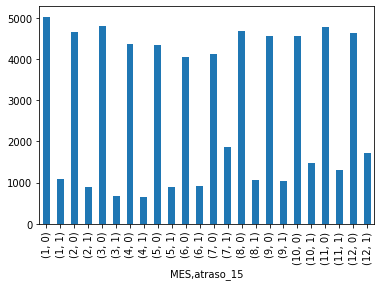

In [17]:
dataset.groupby(["MES","atraso_15"]).count()["DIA"].plot.bar()
# (MES, Atraso): Si dice (1,0) es Mes Enero, Sin Atrasos

In [18]:
lugar = {}
for j in [i for i in dataset.groupby(["Des-I","atraso_15"]).count()["DIA"].index]:
  try:
    lugar[j[0]] = dataset.groupby(["Des-I","atraso_15"]).count()["DIA"][(j[0],1)] /(dataset.groupby(["Des-I","atraso_15"]).count()["DIA"][(j[0],0)] + dataset.groupby(["Des-I","atraso_15"]).count()["DIA"][(j[0],1)] )
  except: 
    lugar[j[0]] = "null"
# (MES, Atraso): Si dice (1,0) es Mes Enero, Sin Atrasos]

In [19]:
lugar

{'CYYZ': 0.3250883392226148,
 'EGLL': 0.15121951219512195,
 'EGYP': 'null',
 'KATL': 0.061452513966480445,
 'KDFW': 0.0700280112044818,
 'KIAH': 0.05373134328358209,
 'KJFK': 0.2402088772845953,
 'KLAX': 0.27741935483870966,
 'KMCO': 0.2647058823529412,
 'KMIA': 0.19901477832512315,
 'LEMD': 0.21140939597315436,
 'LFPG': 0.09192200557103064,
 'LIRF': 0.11969111969111969,
 'MDPC': 0.3333333333333333,
 'MMMX': 0.10428571428571429,
 'MMUN': 0.20634920634920634,
 'MPTO': 0.06756756756756757,
 'NZAA': 0.38227146814404434,
 'SAAR': 0.4338235294117647,
 'SABE': 0.28926955397543636,
 'SACO': 0.3313782991202346,
 'SAEZ': 0.2617283950617284,
 'SAME': 0.2886153846153846,
 'SANT': 0.2631578947368421,
 'SANU': 0.22857142857142856,
 'SARI': 'null',
 'SAWH': 0.6666666666666666,
 'SAZN': 0.10810810810810811,
 'SAZS': 0.5,
 'SBCT': 'null',
 'SBFI': 'null',
 'SBFL': 0.2037037037037037,
 'SBGL': 0.3082287308228731,
 'SBGR': 0.2649859943977591,
 'SCAR': 0.1477832512315271,
 'SCAT': 0.14831460674157304,
 '

Más del 66% de los vuelos con destino a SAWH Son atrasos. Los valores Null se pueden dar porque no existen ningun vuelo con atraso o solo existen vuelos con atrasos como en EGYP que sólo tiene un vuelo registrado y estaba atrasado.

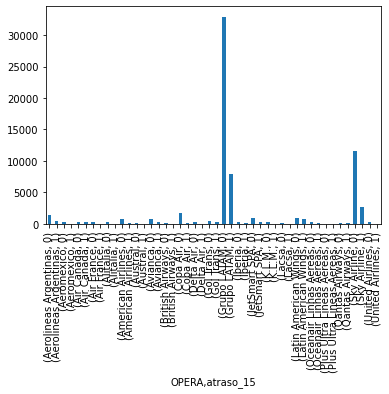

In [20]:
dataset.groupby(["OPERA","atraso_15"]).count()["DIA"].plot.bar()

In [21]:
aerolineas = {}
for j in [i for i in dataset.groupby(["OPERA","atraso_15"]).count()["DIA"].index]:
  try:
    aerolineas[j[0]] = dataset.groupby(["OPERA","atraso_15"]).count()["DIA"][(j[0],1)] /(dataset.groupby(["OPERA","atraso_15"]).count()["DIA"][(j[0],0)] + dataset.groupby(["OPERA","atraso_15"]).count()["DIA"][(j[0],1)] )
  except: 
    aerolineas[j[0]] = "null"
# (MES, Atraso): Si dice (1,0) es Mes Enero, Sin Atrasos]

In [22]:
aerolineas

{'Aerolineas Argentinas': 0.2560287326834274,
 'Aeromexico': 0.03133903133903134,
 'Air Canada': 0.4690265486725664,
 'Air France': 0.0893854748603352,
 'Alitalia': 0.11969111969111969,
 'American Airlines': 0.07001321003963012,
 'Austral': 0.24324324324324326,
 'Avianca': 0.2838541666666667,
 'British Airways': 0.15121951219512195,
 'Copa Air': 0.06756756756756757,
 'Delta Air': 0.061452513966480445,
 'Gol Trans': 0.3746898263027295,
 'Grupo LATAM': 0.19478137533013792,
 'Iberia': 0.12430939226519337,
 'JetSmart SPA': 0.18904109589041096,
 'K.L.M.': 0.09561752988047809,
 'Lacsa': 0.11956521739130435,
 'Latin American Wings': 0.4202032277346085,
 'Oceanair Linhas Aereas': 0.15412186379928317,
 'Plus Ultra Lineas Aereas': 0.6326530612244898,
 'Qantas Airways': 0.6,
 'Sky Airline': 0.19135543432647922,
 'United Airlines': 0.05373134328358209}

Por aerolineas, se puede ver que Latam tiene un 19.4% de vuelos atrasados y Sky Airline tiene 19.1% vuelos atrasados de los que realizan, pero el que tiene mayor cantidad de vuelos atrasados es Air Canada, siendo un 46.9% de sus vuelos atrasados.

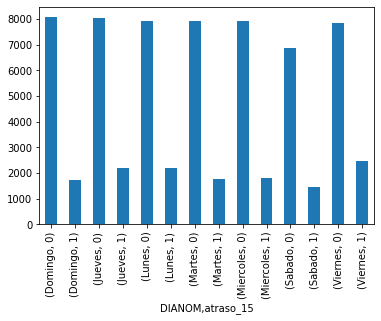

In [23]:
dataset.groupby(["DIANOM","atraso_15"]).count()["DIA"].plot.bar()
# (DIANOM, Atraso): Si dice (1,0) es Día Lunes, Sin Atrasos

Se puede ver que el día Lunes dúa Jueves y Viernes son los días que reportan más atrasos, siendo que son los días con más vuelos.

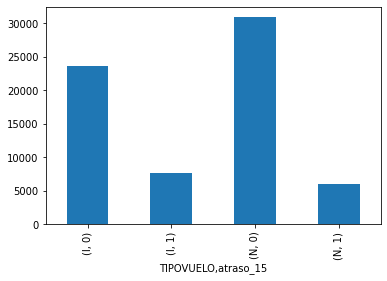

In [24]:
dataset.groupby(["TIPOVUELO","atraso_15"]).count()["DIA"].plot.bar()

Se atrasan más vuelos Internacionales que nacionales.

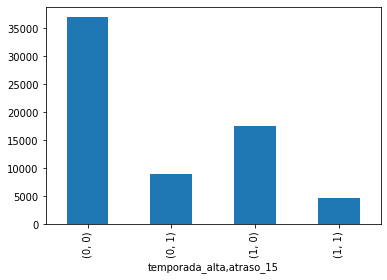

In [25]:
dataset.groupby(["temporada_alta","atraso_15"]).count()["DIA"].plot.bar()

En temporada Alta Se atrasan más que en temporada baja un 20% vs un 19%

Esperaria que influyeran más las aerolineas. Hay varias posibles razones por las que una aerolínea podría tener más atrasos que otras. Una posible razón podría ser la mala gestión de la aerolínea, ya sea en la planificación de los vuelos o en la gestión de posibles retrasos. También podría ser debido a la calidad de los aviones utilizados por la aerolínea, o a la falta de personal capacitado para manejar situaciones de retraso.

In [26]:
dataset.to_csv("synthetic_features.csv")

 La cantidad de vuelos programados en un día puede afectar el riesgo de atrasos, pero no necesariamente aumentará la cantidad de atrasos. Por ejemplo, si hay una mayor cantidad de vuelos programados en un día, podría haber una mayor congestión en el aeropuerto, lo que podría aumentar el riesgo de atrasos. Sin embargo, si la aerolínea tiene una buena gestión y organización, puede minimizar el riesgo de atrasos a pesar de la alta cantidad de vuelos programados.
 

In [27]:
vuelos_dias = dataset.groupby(['AÑO','MES','DIA' ]).count()["DIANOM"]
vuelos_dias = vuelos_dias.reset_index()
vuelos_dias.columns = ["AÑO", "MES", "DIA","VUELOSDIA"]
dataset_new = pd.merge(dataset, vuelos_dias, on=["AÑO", "MES", "DIA"]) # Gracias a este merge, podemos contar los vuelos por cada día

Tambien se considera que los vuelos proximos de hacia atras o hacia adelante pueden tambien atrasar el despegue de un vuelo.

In [28]:
def vuelos_cercanos(row, horas):
    hora_antes, hora_despues =horas
    return len(dataset_new[ (dataset_new['Fecha-I'] >= row['Fecha-I'] - pd.DateOffset(hours=hora_antes)) &
                            (dataset_new['Fecha-I'] <= row['Fecha-I'] + pd.DateOffset(hours=hora_despues)) ] )

columnas_nuevas = {"24horas_antes":(24,0),
                   "12horas_antes":(12,0),
                   "6horas_antes":(6,0),
                   "3horas_antes":(3,0),
                   "3horas_despues":(0,3),
                   "6horas_despues":(0,6),
                   "12horas_despues":(0,12),
                   "24horas_despues":(0,24),
                   "3horas_entre":(3,3),
                   "6horas_entre":(6,6),
                   "12horas_entre":(12,12)}

for new_feature in columnas_nuevas:
  dataset_new[new_feature] = dataset_new.apply(
                              lambda row: vuelos_cercanos(
                                  row, columnas_nuevas[new_feature]) ,
                                  axis='columns')

Luego se hará una diferenciación de Numero de vuelos, si son distintos Vlo-I con Vlo-O, entonces es 1, sino es 0. (Asumiendo que por atrasos pueden que hayan tenido que cambiar de avion, dado que un avion programado no haya estado en el aeropuerto por atraso o clima).



In [29]:
def diff_vlo(row):
  if str(row["Vlo-I"]).strip() == str(row["Vlo-O"]).strip():
    return 0
  return 1

dataset_new["Vlo_diff"] = dataset_new.apply( lambda row: diff_vlo(
                                              row) ,
                                              axis='columns')

In [30]:
dataset_new.to_csv("synthetic_features_propuestas.csv")

Ahora se tienen los datos de cantidad de vuelos en 3,6,12,24 hroas antes y despues, dependiendo de cada vuelo y la suma de vuelos de ellos antes o despues.


# Filtro de Caracteristicas 

Para hacer que el modelo aprenda sin tener un sesgo entre medio, debemos seleccionar las columnas. Para empezar, nuestra columnaa predecir es 'atraso_15', que ya se encuentra con los significados 0 (sin atrasos) y 1 (avión atrasado).


In [31]:
dataset_new.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia', 'VUELOSDIA', '24horas_antes',
       '12horas_antes', '6horas_antes', '3horas_antes', '3horas_despues',
       '6horas_despues', '12horas_despues', '24horas_despues', '3horas_entre',
       '6horas_entre', '12horas_entre', 'Vlo_diff'],
      dtype='object')

Se va a ignorar todas las columnas que puedan entregar indirectamente los valores de "atraso_15", es decir, no se usaran las columnas que se usaron para calcularla.
Se ignoraran: 'Fecha-I', 'Fecha-O' y 'dif_min'.

Utilizaremos varias de las features creadas en este proceso:
 - La columna "Vlo_diff", que contiene la información de "Vlo-I" y "Vlo-O". (0,1) 
 - La columna 'TIPOVUELO',  Nacional 1 y Internacional 0
 - La columna 'OPERA', que será utilizado por Hotencoder. }
 - La columna 'temporada_alta', Si se encuentra en las fechas de temporada alta 1, sino 0.
 - La columna 'periodo_dia', Que se tiene si el vuelo es de mañana, tarde o noche. (otro Hot Encoder).
 - La columna 'VUELOSDIA', Total de vuelo en el día.
 - Y las columnas de cuantos vuelos se encuentran cercanos al vuelo programado. 
 Estas dos ultimas columnas hay que normalizarlas.
 

In [32]:
selected_features = dataset_new[["Vlo_diff","temporada_alta"]] #Ya con HotEncoder

In [33]:
selected_features["TIPOVUELO"] = pd.get_dummies(dataset_new['TIPOVUELO'])["N"] # 0: Nacional, 1:Internacional

<ipython-input-33-93761af24030>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["TIPOVUELO"] = pd.get_dummies(dataset_new['TIPOVUELO'])["N"] # 0: Nacional, 1:Internacional


In [34]:
selected_features = selected_features.join( pd.get_dummies(dataset_new['DIANOM']) )

In [35]:
selected_features = selected_features.join( pd.get_dummies(dataset_new['OPERA']) )

In [92]:
# Normaliza por Min_max en VuelosDia
selected_features['VUELOSDIA_minmax'] = (
    dataset_new['VUELOSDIA'] -
    dataset_new['VUELOSDIA'].min()
) /  (dataset_new['VUELOSDIA'].max() -dataset_new['VUELOSDIA'].min())

In [93]:
# Se normalizan con MinMax la cantidad de vuelos por horario
for key in columnas_nuevas:
  selected_features['{}_minmax'.format(key)] = (
      (    dataset_new[key] - dataset_new[key].min()
  ) /  (dataset_new[key].max() -dataset_new[key].min()))

In [94]:
for key in ["DIA","MES"]:
  selected_features['{}_minmax'.format(key)] = (
      (    dataset_new[key] - dataset_new[key].min()
  ) /  (dataset_new[key].max() -dataset_new[key].min()))

In [103]:
selected_features.to_csv("synthetic_features_propuestas.csv")

In [95]:
selected_features.describe()

,Vlo_diff,temporada_alta,TIPOVUELO,Domingo,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes,...,12horas_antes_minmax,6horas_antes_minmax,3horas_antes_minmax,3horas_despues_minmax,6horas_despues_minmax,12horas_despues_minmax,24horas_despues_minmax,3horas_entre_minmax,6horas_entre_minmax,12horas_entre_minmax
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,...,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,0.066241,0.325343,0.541984,0.143626,0.150282,0.148537,0.141661,0.142541,0.122454,0.150898,...,0.652153,0.643675,0.554804,0.554804,0.639047,0.649737,0.794925,0.662946,0.663316,0.720204
std,0.248706,0.468506,0.498238,0.350712,0.357350,0.355635,0.348705,0.349607,0.327812,0.357952,...,0.158535,0.191548,0.176500,0.177117,0.194672,0.160009,0.085995,0.177298,0.147586,0.110845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.524138,0.512821,0.479167,0.479167,0.506494,0.520833,0.741525,0.597222,0.552239,0.647399
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.648276,0.705128,0.583333,0.583333,0.701299,0.645833,0.805085,0.708333,0.671642,0.734104
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.786207,0.782051,0.666667,0.666667,0.779221,0.784722,0.855932,0.777778,0.776119,0.803468
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Entrenamiento

In [96]:
from sklearn.model_selection import train_test_split
X, y = selected_features, dataset_new["atraso_15"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [97]:
from sklearn.utils.class_weight import compute_sample_weight
def predict(model, balanced = True):
    """Con esta función se puede entrenar y ver métricas rápida de algún modelo.

    Args:
        model (sklearn.model): El modelo que se quiere entrenar.
    """
    print('Model: {}'.format(model))   #Imprime el modelo a estudiar
    if balanced:
        sample_weights = compute_sample_weight(
            class_weight='balanced', y=y_train)
        model.fit(X_train,y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train,y_train)  #Entrenando modelo
    y_pred = model.predict(X_test) #Prediciendo modelo
    print('R2 score',r2_score(y_test,y_pred)) 
    y_pred_int = [int(item) for item in (y_pred > 0.5)]  
    print('Accuracy', accuracy_score(y_test,y_pred_int))
    print('Accuracy', round(accuracy_score(y_test, y_pred_int),3))
    print('Precision', round(precision_score(y_test, y_pred_int),3))
    print('Recall', round(recall_score(y_test, y_pred_int),3))
    print('F1 Score', round(f1_score(y_test, y_pred_int),3))
    sns.distplot(y_test-y_pred, label = str(model)) # Graficando modelo
    cm = confusion_matrix( y_test, y_pred_int)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Sin Atraso", "Atraso"]) 
    cm_display.plot() 
    plt.show()
    try:
        coeficientes = pd.DataFrame(data={'var': X_train.columns.values, 'coef': model.coef_[0]})
        coeficientes = coeficientes.sort_values('coef')
        print(coeficientes.head(5))
        print(coeficientes.tail(5))
    except:
        pass

Model: Lasso()
R2 score -1.2193242012070726e-05
Accuracy 0.801480829851184
Accuracy 0.801
Precision 0.0
Recall 0.0
F1 Score 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


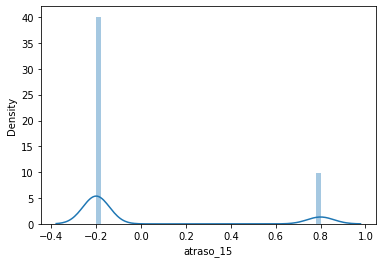

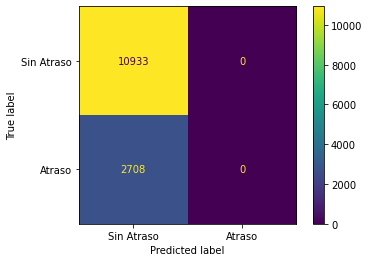

                       var  coef
0                 Vlo_diff   0.0
25                  K.L.M.   0.0
26                   Lacsa   0.0
27    Latin American Wings   0.0
28  Oceanair Linhas Aereas   0.0
                     var  coef
18       British Airways   0.0
19              Copa Air   0.0
20             Delta Air   0.0
11            Aeromexico   0.0
46  12horas_entre_minmax   0.0
Model: LinearRegression()
R2 score 0.059443397952357646
Accuracy 0.8036800821054175
Accuracy 0.804
Precision 0.617
Recall 0.029
F1 Score 0.056


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


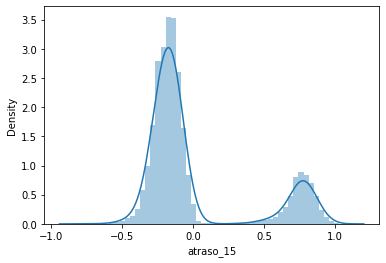

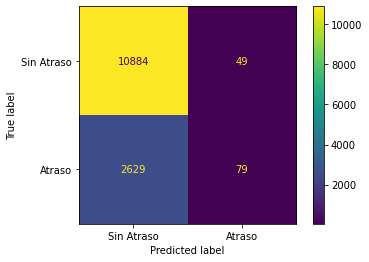

                       var      coef
0                 Vlo_diff  0.001387
25                  K.L.M.  0.001387
26                   Lacsa  0.001387
27    Latin American Wings  0.001387
28  Oceanair Linhas Aereas  0.001387
                     var      coef
18       British Airways  0.001387
19              Copa Air  0.001387
20             Delta Air  0.001387
11            Aeromexico  0.001387
46  12horas_entre_minmax  0.001387
Model: Ridge()
R2 score 0.059484167355566164
Accuracy 0.803606773696943
Accuracy 0.804
Precision 0.614
Recall 0.029
F1 Score 0.055


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


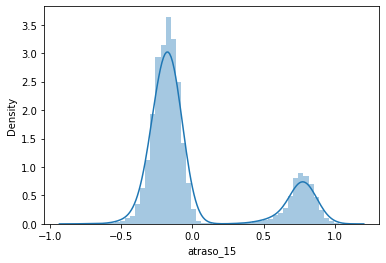

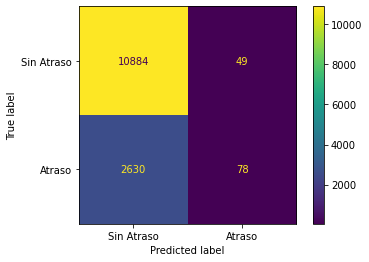

                       var      coef
0                 Vlo_diff  0.001489
25                  K.L.M.  0.001489
26                   Lacsa  0.001489
27    Latin American Wings  0.001489
28  Oceanair Linhas Aereas  0.001489
                     var      coef
18       British Airways  0.001489
19              Copa Air  0.001489
20             Delta Air  0.001489
11            Aeromexico  0.001489
46  12horas_entre_minmax  0.001489
Model: KNeighborsRegressor()
R2 score 0.011799653617353245
Accuracy 0.7980353346528847
Accuracy 0.798
Precision 0.484
Recall 0.265
F1 Score 0.342


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


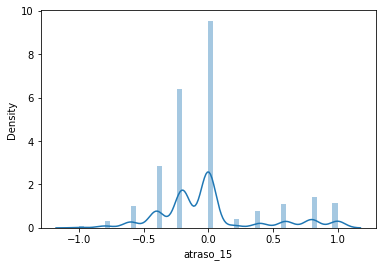

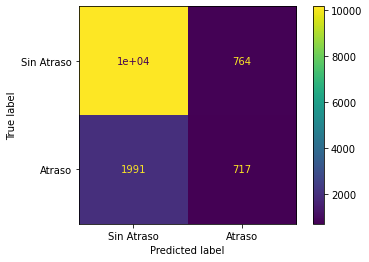

Model: XGBRegressor()
[04:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.08236865628061885
Accuracy 0.8069056520782933
Accuracy 0.807
Precision 0.687
Recall 0.05
F1 Score 0.094


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


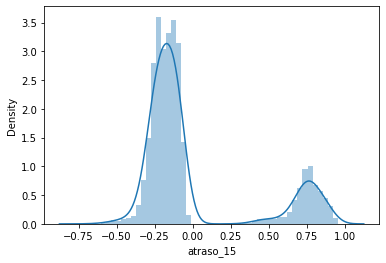

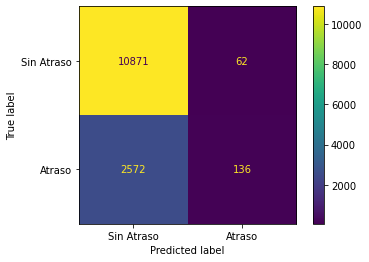

In [98]:
lista_modelos = [Lasso(),LinearRegression(),Ridge(),KNeighborsRegressor(),
                 XGBRegressor()]

for model in lista_modelos:
    predict(model, False)

Estoy mostrando que los datos aquí estan desbalanceado tal que los modelos prefieren decir que ningun vuelo se atrasa.
Como la base de datos se encuentra desbalanceada, se sugiere hacer un entrenamiento con desbalanzamiento.

Se puede intentar una de las siguientes técnicas para tratar de equilibrarlo:

 - Muestrear el conjunto de datos de manera aleatoria para obtener un subconjunto equilibrado de datos.

 - Sobremuestrear las clases minoritarias del conjunto de datos para aumentar su proporción dentro del conjunto de datos.

 - Submuestrear las clases mayoritarias del conjunto de datos para reducir su proporción dentro del conjunto de datos.

 - Utilizar técnicas de remuestreo como el remuestreo por bajo costo o el remuestreo por sobrecosto para tratar de equilibrar el conjunto de datos.

 - Para implementar cualquiera de estas técnicas en Python, puedes utilizar librerías como imbalanced-learn o scikit-learn para ayudarte a manejar y equilibrar el conjunto de datos. Por ejemplo, puedes usar el módulo de remuestreo de imbalanced-learn para sobremuestrear las clases minoritarias del conjunto de datos de la siguiente manera:

Model: Lasso()
R2 score -0.5712468441120016
Accuracy 0.19851917014881607
Accuracy 0.199
Precision 0.199
Recall 1.0
F1 Score 0.331


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


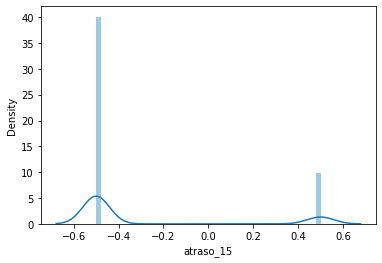

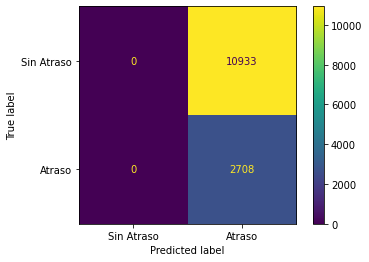

                       var  coef
0                 Vlo_diff   0.0
25                  K.L.M.   0.0
26                   Lacsa   0.0
27    Latin American Wings   0.0
28  Oceanair Linhas Aereas   0.0
                     var  coef
18       British Airways   0.0
19              Copa Air   0.0
20             Delta Air   0.0
11            Aeromexico   0.0
46  12horas_entre_minmax   0.0
Model: LinearRegression()
R2 score -0.4445222917838638
Accuracy 0.6198959020599663
Accuracy 0.62
Precision 0.287
Recall 0.614
F1 Score 0.391


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


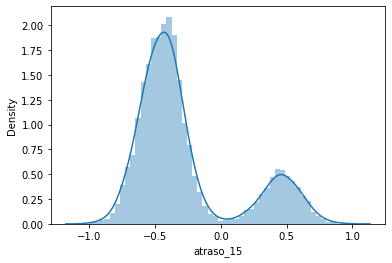

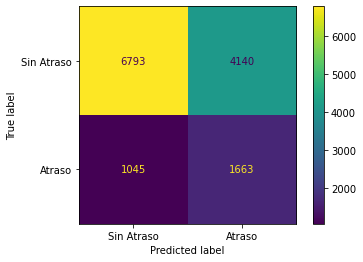

                       var      coef
0                 Vlo_diff -0.010835
25                  K.L.M. -0.010835
26                   Lacsa -0.010835
27    Latin American Wings -0.010835
28  Oceanair Linhas Aereas -0.010835
                     var      coef
18       British Airways -0.010835
19              Copa Air -0.010835
20             Delta Air -0.010835
11            Aeromexico -0.010835
46  12horas_entre_minmax -0.010835
Model: Ridge()
R2 score -0.4233219115723055
Accuracy 0.6264203504141925
Accuracy 0.626
Precision 0.29
Recall 0.608
F1 Score 0.392


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


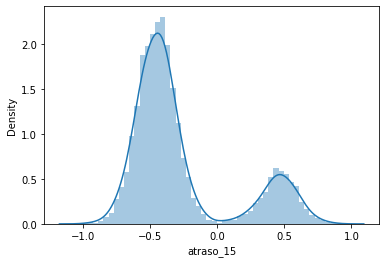

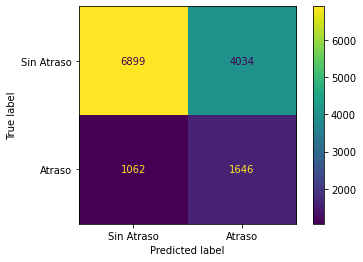

                       var      coef
0                 Vlo_diff -0.008095
25                  K.L.M. -0.008095
26                   Lacsa -0.008095
27    Latin American Wings -0.008095
28  Oceanair Linhas Aereas -0.008095
                     var      coef
18       British Airways -0.008095
19              Copa Air -0.008095
20             Delta Air -0.008095
11            Aeromexico -0.008095
46  12horas_entre_minmax -0.008095
Model: LogisticRegression()


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R2 score -1.3507078362757663
Accuracy 0.6259804999633458
Accuracy 0.626
Precision 0.29
Recall 0.61
F1 Score 0.393


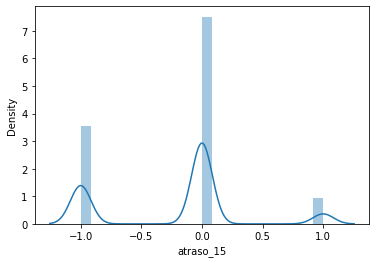

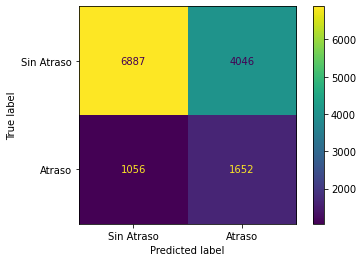

                  var      coef
11         Aeromexico -2.000541
32    United Airlines -1.673229
20          Delta Air -1.512730
15  American Airlines -1.377895
13         Air France -1.071888
                         var      coef
12                Air Canada  1.188297
27      Latin American Wings  1.461737
29  Plus Ultra Lineas Aereas  1.578945
36      24horas_antes_minmax  1.761947
30            Qantas Airways  1.789151


In [99]:
lista_modelos = [Lasso(),LinearRegression(),Ridge(),LogisticRegression()]

for model in lista_modelos:
    predict(model, True)

Para predecir si los vuelos se van a retrasar debido a un desbalance en el conjunto de datos y es importante saber cuándo un avión se va a retrasar, podría utilizar una métrica de desempeño como la precisión y un modelo de aprendizaje supervisado como una regresión logística.

La precisión es una buena métrica de desempeño en este caso ya que me permite medir cuántas predicciones del modelo son correctas. En el caso de predecir si un vuelo se va a retrasar, una alta precisión significaría que el modelo es capaz de predecir con éxito si un vuelo se va a retrasar o no.

La regresión logística es un buen modelo en este caso ya que es un modelo de aprendizaje supervisado que puede utilizarse para predecir la probabilidad de que un evento ocurra (en este caso, la probabilidad de que un vuelo se retrase). Además, la regresión logística es capaz de manejar conjuntos de datos desbalanceados y puede ser entrenada para dar peso a las clases minoritarias para mejorar la precisión de las predicciones.

Ahora mnuestro el mejor modelo que tuve respecto a la seleccion del Recall

Model: LogisticRegression()


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R2 score -1.3507078362757663
Accuracy 0.6259804999633458
Accuracy 0.626
Precision 0.29
Recall 0.61
F1 Score 0.393


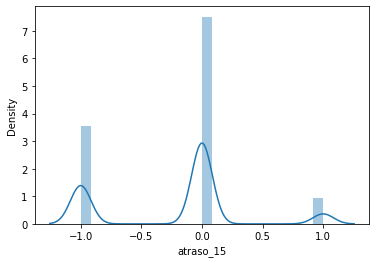

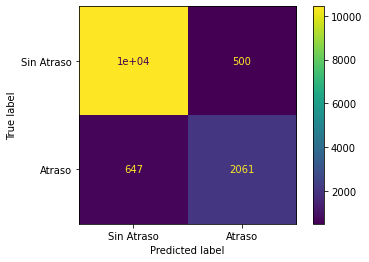

                         var      coef
11                Aeromexico -2.000541
32           United Airlines -1.673229
20                 Delta Air -1.512730
15         American Airlines -1.377895
13                Air France -1.071888
19                  Copa Air -0.867366
41     6horas_despues_minmax -0.854089
25                    K.L.M. -0.806145
2                  TIPOVUELO -0.691647
14                  Alitalia -0.574147
23                    Iberia -0.509818
28    Oceanair Linhas Aereas -0.427473
18           British Airways -0.422291
8                     Sabado -0.370115
7                  Miercoles -0.334808
6                     Martes -0.333274
37      12horas_antes_minmax -0.321578
5                      Lunes -0.235157
3                    Domingo -0.204910
4                     Jueves -0.193354
26                     Lacsa -0.184960
42    12horas_despues_minmax -0.170492
9                    Viernes -0.123918
33                DIA_minmax -0.100994
43    24horas_despues_min

In [102]:
predict(LogisticRegression(), True)


Es posible que las variables mes, día de la semana y cantidad de vuelos en las últimas 24 y 6 horas afecten el atraso de un avión por varias razones.

En primer lugar, el mes puede afectar el atraso de un avión ya que algunos meses pueden ser más propensos a condiciones meteorológicas desfavorables que causen retrasos. Por ejemplo, un mes con una alta probabilidad de nevadas o tormentas de granizo puede causar retrasos en los vuelos debido a las condiciones de vuelo peligrosas.

En segundo lugar, el día de la semana puede afectar el atraso de un avión ya que algunos días de la semana pueden tener mayor tráfico aéreo que otros. Por ejemplo, si un avión se retrasa en un día de alta demanda, puede ser más difícil encontrar un lugar en un horario de salida posterior, lo que puede causar un mayor atraso en el vuelo.

Por último, la cantidad de vuelos en las últimas 3 horas puede afectar el atraso de un avión ya que si hay una alta cantidad de vuelos en un corto período de tiempo, puede haber una mayor congestión en el espacio aéreo y en las pistas de aterrizaje. Esto puede causar retrasos en los vuelos debido a la falta de espacio para despegar y aterrizar de manera eficiente.

En resumen, el mes, el día de la semana y la cantidad de vuelos en las últimas 3 horas pueden afectar el atraso de un avión ya que pueden afectar las condiciones meteorológicas, el tráfico aéreo y la congestión en el espacio aéreo.



Dado los registros y el anteior estudio, el peso de que un vuelo se atrase o no  depende mucho de los vuelos que se realizan en cada empresa de vuelo. Por lo que se pueden hacer los siguientes **casos de mejoras:**

 - La propuesta es contar los vuelos anteriores a un vuelo dado de una determinada empresa. Por ejemplo, repetir la misma función anterior, pero antes filtrar por empresa:



```python
def vuelos_cercanos(row, horas):
    hora_antes, hora_despues =horas
    dataset_tmp = dataset_new[row["OPERA"]]
    return len(dataset_tmp[ (dataset_tmp['Fecha-I'] >= row['Fecha-I'] - pd.DateOffset(hours=hora_antes)) &
                            (dataset_tmp['Fecha-I'] <= row['Fecha-I'] + pd.DateOffset(hours=hora_despues)) ] )
```
Esta función recuperaría el número de vuelos de la empresa dada que ocurrieron antes de la fecha del vuelo especificado. Ya que se puede producir que un atraso puede ser más afectados por culpa de organización de una empresa misma.

 - Otras mejoras seria enfocarnos en la mejora de hiperparametros ejemplo podemos usar Pycaret, para la seleccion de parametros y tener un mejor resultado. Sólo cambiando hiperparametros se puede mejorar bastante y la libreria Pycaret te facilita ese trabajo.

 - Además de buscar otros modelos de aprendizaje, podriamos entrenar con deep learning, con una red simple, podemos llegar e buenos resultados pero perdemos el enfoque de analizar las columnas que más afectan al modelo.